# Exploratory Data Analysis

**It is important to recognize that the data presented here does not reporesented the number of actual violent crimes but the number of violent crimes that were reported to Sherriff's Office or County Police Department**

* 06/24/2021 Note:

    I, Shane McCallum, am going to explore and test the hypothesis that ethnicity/race cannot be used to predict the violent crime rate within a county. My intentions here are to clarify the most important features in forecasting violent crime at a county level. I believe with how charged the topics of race, racism, policing and violent crime are, that it is our responsibility as scientist to not leave a vaccuum or emptiness in our testing for bigotry and fear to seed and grow out of.

    I know what I hope to find; however, in testing the data it is possible that an undesireable but "important" feature will exists. Mr. Fletcher and myself will decide what the ethical choice is in regards to this data. Perhaps we will bury it. That said, I truly believe a model can be developed to forecast and predict violent crime rates, and in turn proactive policing and public health campaigns can be developed and implemented in order to save lives and build safer communities for us all.

<br>
<br>

In [22]:
# %%
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from pandarallel import pandarallel
pandarallel.initialize(progress_bar=False)


from us_state_abbrev import us_state_abbrev, abbrev_us_state
%matplotlib inline
# %%
datap = Path('../Data')  # set the data path


INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [23]:
# import
dfin = pd.read_parquet(datap/'merged_df.parquet.gzip')
dfin

,State,County,Diversity-Index,"Black or African American alone, percent, 2013","American Indian and Alaska Native alone, percent, 2013","Asian alone, percent, 2013","Native Hawaiian and Other Pacific Islander alone, percent,","Two or More Races, percent, 2013","Hispanic or Latino, percent, 2013","White alone, not Hispanic or Latino, percent, 2013",...,Rape_(legacy_definition)2,Robbery,Aggravated _assault,Property _crime,Burglary,Larceny-_theft,Motor _vehicle _theft,Arson3,population_in_2013,violent_crime_pct
0,AL,Autauga,0.388898,18.4,0.5,1.1,0.1,1.7,2.7,75.9,...,NaN,3.0,54.0,444.0,160.0,238.0,46.0,NaN,54727.0,0.001316
1,AL,Baldwin,0.297942,9.5,0.7,0.9,0.1,1.5,4.6,83.1,...,NaN,27.0,71.0,674.0,250.0,380.0,44.0,NaN,194885.0,0.000570
2,AL,Barbour,0.556605,47.6,0.6,0.5,0.2,0.9,4.8,46.3,...,NaN,2.0,16.0,115.0,43.0,63.0,9.0,NaN,26937.0,0.000780
3,AL,Bibb,0.394100,22.1,0.4,0.2,0.1,0.9,2.1,74.6,...,NaN,0.0,8.0,123.0,65.0,40.0,18.0,NaN,22521.0,0.000355
4,AL,Blount,0.221056,1.8,0.6,0.3,0.1,1.1,8.7,87.8,...,NaN,0.0,82.0,947.0,302.0,562.0,83.0,NaN,57619.0,0.001579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2417,WY,Platte,0.197897,0.9,0.7,0.5,0.2,1.4,7.8,89.2,...,0.0,0.0,2.0,36.0,16.0,17.0,3.0,0.0,8710.0,0.000230
2418,WY,Sheridan,0.162154,1.2,1.4,0.8,0.1,1.4,4.3,91.4,...,0.0,0.0,1.0,39.0,7.0,30.0,2.0,1.0,29733.0,0.000034
2419,WY,Sublette,0.218882,1.4,1.1,1.1,0.0,1.4,7.8,88.0,...,1.0,0.0,13.0,119.0,13.0,101.0,5.0,0.0,10175.0,0.001376
2420,WY,Sweetwater,0.340296,1.7,1.2,0.9,0.2,1.7,15.9,79.6,...,2.0,0.0,18.0,111.0,25.0,73.0,13.0,3.0,45157.0,0.000443


SM: Checking for any counties that did not provide information to calculate levels of diversity.

In [24]:
dfin.loc[dfin['Diversity-Index'] == 0]

,State,County,Diversity-Index,"Black or African American alone, percent, 2013","American Indian and Alaska Native alone, percent, 2013","Asian alone, percent, 2013","Native Hawaiian and Other Pacific Islander alone, percent,","Two or More Races, percent, 2013","Hispanic or Latino, percent, 2013","White alone, not Hispanic or Latino, percent, 2013",...,Rape_(legacy_definition)2,Robbery,Aggravated _assault,Property _crime,Burglary,Larceny-_theft,Motor _vehicle _theft,Arson3,population_in_2013,violent_crime_pct


In [25]:
dfin.loc[(dfin['Violent_Crime'] == 0) & (dfin['Property _crime'] == 0)]

,State,County,Diversity-Index,"Black or African American alone, percent, 2013","American Indian and Alaska Native alone, percent, 2013","Asian alone, percent, 2013","Native Hawaiian and Other Pacific Islander alone, percent,","Two or More Races, percent, 2013","Hispanic or Latino, percent, 2013","White alone, not Hispanic or Latino, percent, 2013",...,Rape_(legacy_definition)2,Robbery,Aggravated _assault,Property _crime,Burglary,Larceny-_theft,Motor _vehicle _theft,Arson3,population_in_2013,violent_crime_pct
220,CO,Ouray,0.141661,0.2,0.4,0.6,0.1,1.6,4.9,92.5,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4552.0,0.0
318,GA,Clarke,0.591439,27.3,0.4,4.3,0.1,1.9,10.7,56.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120888.0,0.0
319,GA,Clay,0.504339,59.5,0.3,0.5,0.1,0.9,1.2,37.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3015.0,0.0
322,GA,Cobb,0.609575,26.7,0.5,4.9,0.1,2.3,12.6,54.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,716017.0,0.0
390,GA,Polk,0.443599,13.0,0.8,0.8,0.2,1.6,12.8,72.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40977.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,TX,Collingsworth,0.527085,6.0,2.4,0.5,0.0,1.7,32.0,60.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3100.0,0.0
1947,TX,Cottle,0.502624,10.1,0.7,0.1,0.1,1.2,23.8,65.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1442.0,0.0
2108,TX,Sutton,0.483570,0.9,0.8,0.4,0.0,0.8,61.1,37.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3982.0,0.0
2247,VT,Chittenden,0.178613,2.3,0.3,3.2,0.0,2.0,2.0,90.5,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,159432.0,0.0


In [26]:
dfin.drop(dfin[dfin['Violent_Crime']==0].index & dfin[dfin['Property _crime']==0].index, inplace=True)
dfin.loc[(dfin['Violent_Crime'] == 0) & (dfin['Property _crime'] == 0)]

,State,County,Diversity-Index,"Black or African American alone, percent, 2013","American Indian and Alaska Native alone, percent, 2013","Asian alone, percent, 2013","Native Hawaiian and Other Pacific Islander alone, percent,","Two or More Races, percent, 2013","Hispanic or Latino, percent, 2013","White alone, not Hispanic or Latino, percent, 2013",...,Rape_(legacy_definition)2,Robbery,Aggravated _assault,Property _crime,Burglary,Larceny-_theft,Motor _vehicle _theft,Arson3,population_in_2013,violent_crime_pct


In [27]:
dfin.columns

Index(['State', 'County', 'Diversity-Index',
       'Black or African American alone, percent, 2013',
       'American Indian and Alaska Native alone, percent, 2013',
       'Asian alone, percent, 2013',
       'Native Hawaiian and Other Pacific Islander alone, percent,',
       'Two or More Races, percent, 2013', 'Hispanic or Latino, percent, 2013',
       'White alone, not Hispanic or Latino, percent, 2013', 'Violent_Crime',
       'Murder and _nonnegligent _manslaughter', 'Rape_(revised _definition)1',
       'Rape_(legacy_definition)2', 'Robbery', 'Aggravated _assault',
       'Property _crime', 'Burglary', 'Larceny-_theft',
       'Motor _vehicle _theft', 'Arson3', 'population_in_2013',
       'violent_crime_pct'],
      dtype='object')

In [28]:
df = dfin[['State', 'County', 'Diversity-Index', 'Violent_Crime', 'population_in_2013', 'violent_crime_pct']]
df.head(3)

,State,County,Diversity-Index,Violent_Crime,population_in_2013,violent_crime_pct
0,AL,Autauga,0.388898,72.0,54727.0,0.001316
1,AL,Baldwin,0.297942,111.0,194885.0,0.000570
2,AL,Barbour,0.556605,21.0,26937.0,0.000780


In [29]:
# group by state and sort by AVG diversity
df_gb_state_d = df[['State', 'Diversity-Index']].groupby('State').parallel_apply(np.mean)
df_gb_state_d.head()

,Diversity-Index
State,
AL,0.403952
AR,0.314315
AZ,0.500013
CA,0.512964
CO,0.354609


In [30]:
# group by state and sort by TOTAL number of violent crimes
df_gb_state_v = df[['State', 'Violent_Crime', 'population_in_2013']].groupby('State').sum()

# df_gb_state_v = df_gb_state_v.merge(df[['State', 'population_in_2013']].groupby('State').mean(), on='State', how='inner')
df_gb_state_v['pct_violent_crimes_by_state'] = 100 * (df_gb_state_v['Violent_Crime'] / df_gb_state_v['population_in_2013'] )
df_gb_state_v.head()


,Violent_Crime,population_in_2013,pct_violent_crimes_by_state
State,,,
AL,3531.0,3785348.0,0.093281
AR,2649.0,2602201.0,0.101798
AZ,2896.0,6238450.0,0.046422
CA,24038.0,36968755.0,0.065022
CO,2311.0,4173408.0,0.055374


In [31]:
# merge the two dataframes 
df_gb_state = df_gb_state_d.merge(df_gb_state_v, on='State', how='inner')
df_gb_state.head()

,Diversity-Index,Violent_Crime,population_in_2013,pct_violent_crimes_by_state
State,,,,
AL,0.403952,3531.0,3785348.0,0.093281
AR,0.314315,2649.0,2602201.0,0.101798
AZ,0.500013,2896.0,6238450.0,0.046422
CA,0.512964,24038.0,36968755.0,0.065022
CO,0.354609,2311.0,4173408.0,0.055374


<br>
<br>
<hr>


# Plotting the data by State
Note: this does not give great information as the resolution is too low.  

<br>
<br>

## Plot: Diversity Index by State

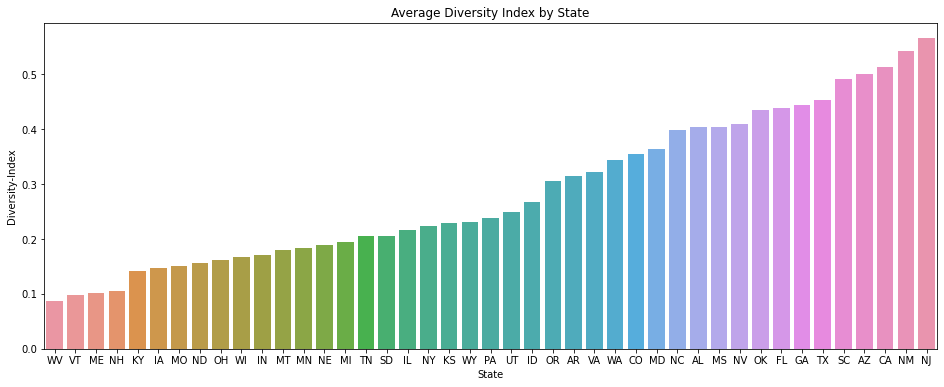

In [32]:
df_gb_state = df_gb_state.sort_values('Diversity-Index')

plt.figure(figsize=[16,6])
sns.barplot(x=df_gb_state.index, y=df_gb_state['Diversity-Index'])
plt.title('Average Diversity Index by State')
plt.show()

SM: Interesting! I didn't think New Mexico would be the most diverse state; bu it makes sense when you think about how the diversity index is calculated.

SM: AHA! After cleaning some, NJ was the lowest but is now the HIGHEST

<br>
<br>

## Plot: TOTAL Violent Crimes by State

Note that this is a histogram of the raw data and it hasn't been corrected for population differences yet

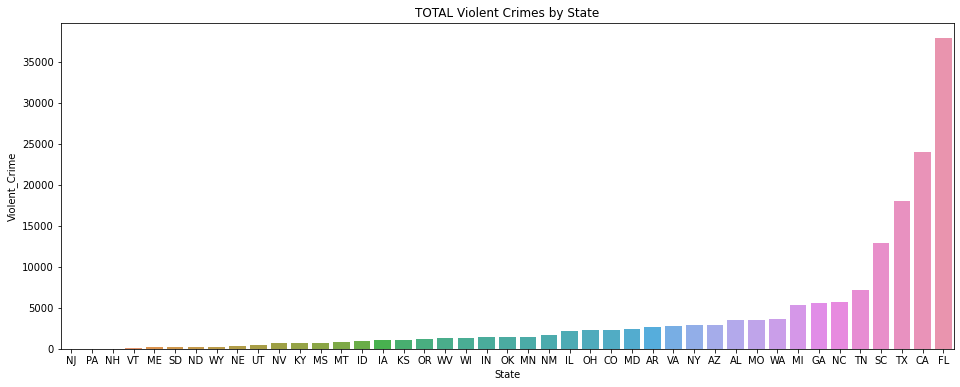

In [34]:
df_gb_state = df_gb_state.sort_values(by='Violent_Crime')

plt.figure(figsize=[16,6])

sns.barplot(x=df_gb_state.index, y=df_gb_state['Violent_Crime'])
plt.title('TOTAL Violent Crimes by State')
plt.show()

<br>
<br>

## Plot: Violent Crimes as a percentage of State population

Note that this is a histogram of the raw data and it hasn't been corrected for population differences yet

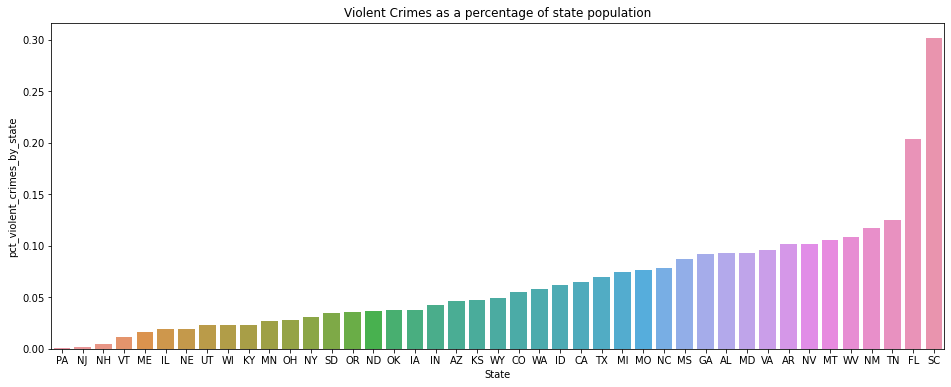

In [35]:
df_gb_state = df_gb_state.sort_values(by='pct_violent_crimes_by_state')

plt.figure(figsize=[16,6])

sns.barplot(x=df_gb_state.index, y=df_gb_state['pct_violent_crimes_by_state'])
plt.title('Violent Crimes as a percentage of state population')
plt.show()

<br>
<br>

## Plot: Comparing Diversity with Violent Crimes as a percentage of State population


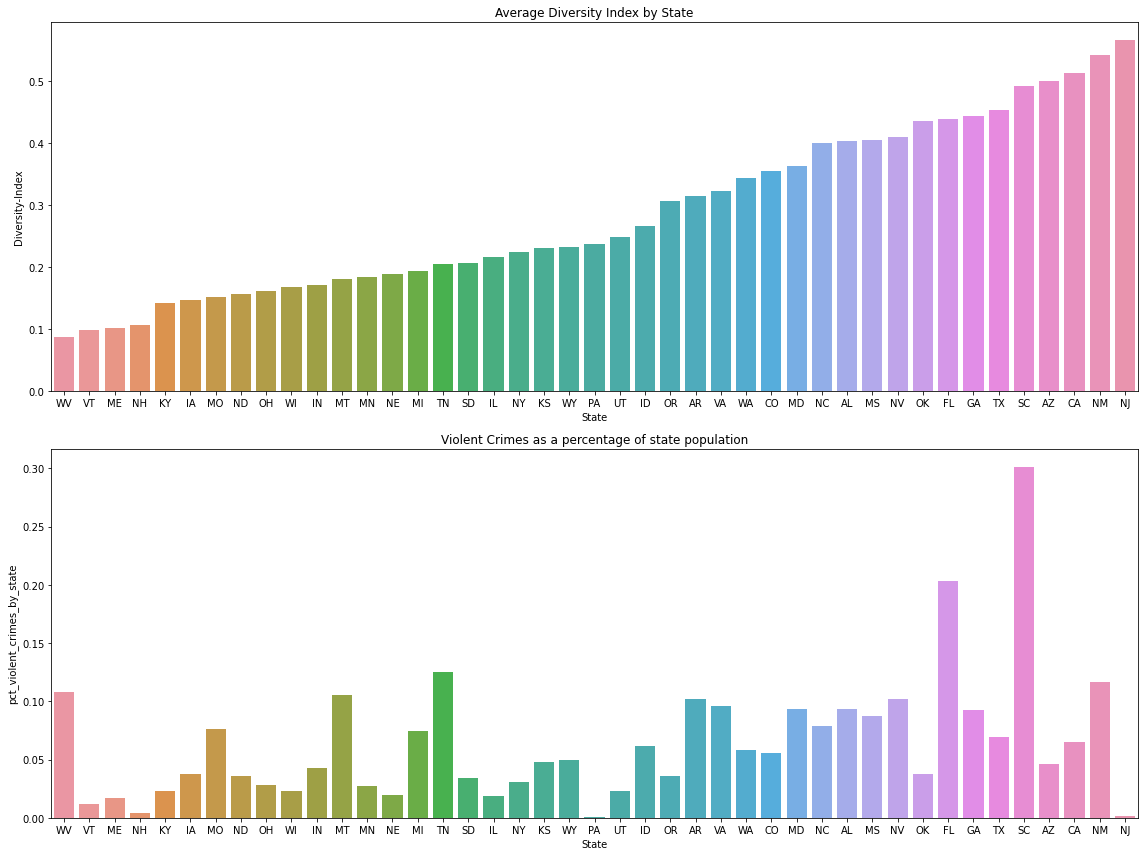

In [36]:
df_gb_state = df_gb_state.sort_values('Diversity-Index')

fig,axes = plt.subplots(2,1, figsize=(16,12))

sns.barplot(x=df_gb_state.index, y=df_gb_state['Diversity-Index'], ax=axes[0])
axes[0].title.set_text('Average Diversity Index by State')

sns.barplot(x=df_gb_state.index, y=df_gb_state['pct_violent_crimes_by_state'], ax=axes[1])
axes[1].title.set_text('Violent Crimes as a percentage of state population')

plt.tight_layout()
plt.show()

<br>
<br>
<br>
<hr>


# Plotting the data by County

<br>
<br>

In [37]:
df = df.set_index(['State', 'County'])
df

Diversity-Index  Violent_Crime  population_in_2013  \
State County                                                           
AL    Autauga            0.388898           72.0             54727.0   
      Baldwin            0.297942          111.0            194885.0   
      Barbour            0.556605           21.0             26937.0   
      Bibb               0.394100            8.0             22521.0   
      Blount             0.221056           91.0             57619.0   
...                           ...            ...                 ...   
WY    Platte             0.197897            2.0              8710.0   
      Sheridan           0.162154            1.0             29733.0   
      Sublette           0.218882           14.0             10175.0   
      Sweetwater         0.340296           20.0             45157.0   
      Uinta              0.225552            0.0             20951.0   

                  violent_crime_pct  
State County                         
AL    Autauga              0.001316  
      Baldwin              0.000570  
      Barbour              0.000780  
      Bibb                 0.000355  
      Blount               0.001579  
...                             ...  
WY    Platte               0.000230  
      Sheridan             0.000034  
      Sublette             0.001376  
      Sweetwater           0.000443  
      Uinta                0.000000  

[2360 rows x 4 columns]

<br>
<br>

## Violin plots

Plots show major outliers

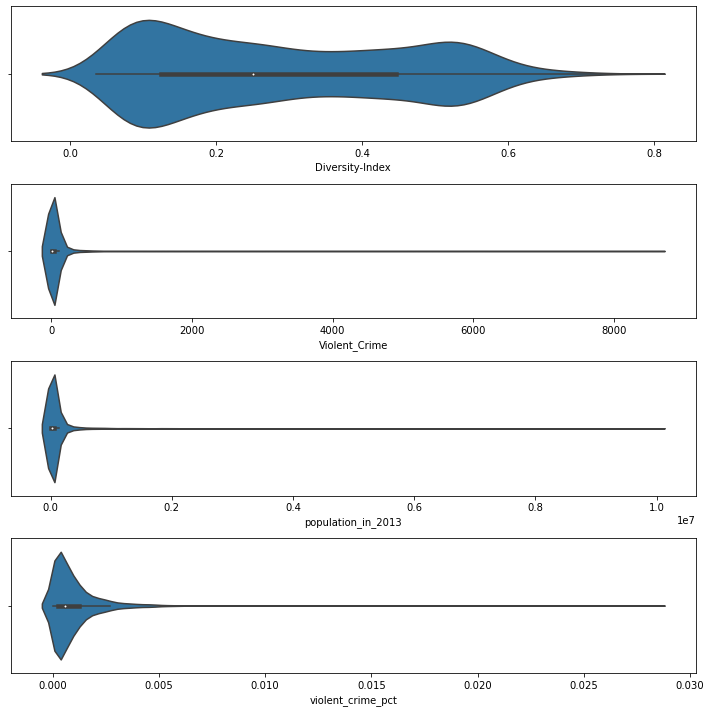

In [38]:

fig,ax = plt.subplots(4,1, figsize=(10,10), sharex=False, sharey=False)
    

sns.violinplot(x='Diversity-Index', data=df, ax=ax[0])
sns.violinplot(x='Violent_Crime', data=df, ax=ax[1])
sns.violinplot(x='population_in_2013', data=df, ax=ax[2])
sns.violinplot(x='violent_crime_pct', data=df, ax=ax[3])

plt.tight_layout()

<br>
<br>

## Pairplots with Linear Regression

Shows poor correlation, but the data has not had outliers removed.


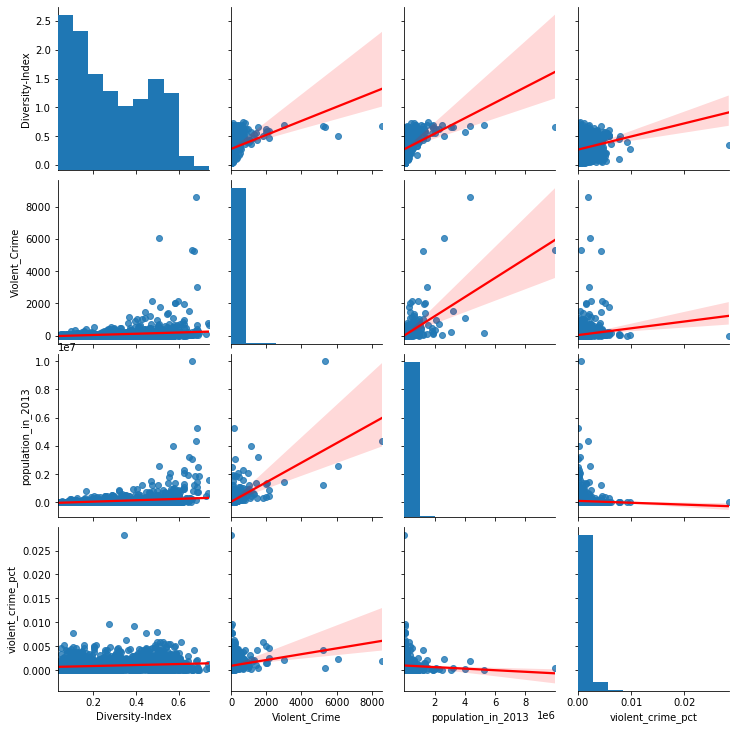

In [39]:
sns.pairplot(df, kind='reg', plot_kws={'line_kws':{'color':'red'}})

<br>
<br>

## Temporarily remove outliers in the Y 


In [40]:
from feature_engine.outliers import OutlierTrimmer

# set up the capper
capper = OutlierTrimmer(capping_method='iqr', fold=1.5) #, variables=['violent_crime_pct'])

capper.fit(df)

df_temp = capper.transform(df)


<br>
<br>

## Violin plots

Plots show outliers removed

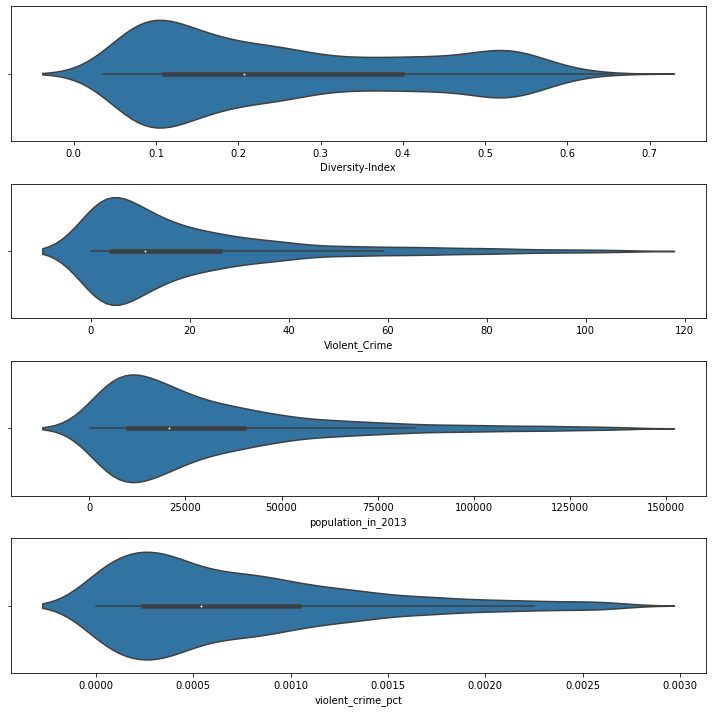

In [41]:

fig,ax = plt.subplots(4,1, figsize=(10,10), sharex=False, sharey=False)
    

sns.violinplot(x='Diversity-Index', data=df_temp, ax=ax[0])
sns.violinplot(x='Violent_Crime', data=df_temp, ax=ax[1])
sns.violinplot(x='population_in_2013', data=df_temp, ax=ax[2])
sns.violinplot(x='violent_crime_pct', data=df_temp, ax=ax[3])

plt.tight_layout()

<br>
<br>

## Compare Violin plots with before and after outlier removal

Plots show outliers removed

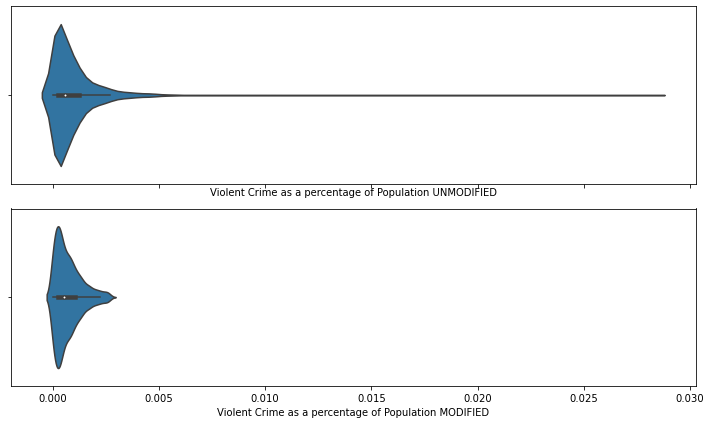

In [42]:

fig,ax = plt.subplots(2,1, figsize=(10,6), sharex=True, sharey=False)
    
axa = sns.violinplot(x='violent_crime_pct', data=df, ax=ax[0])
axa.set(xlabel='Violent Crime as a percentage of Population UNMODIFIED')

axa = sns.violinplot(x='violent_crime_pct', data=df_temp, ax=ax[1])
axa.set(xlabel='Violent Crime as a percentage of Population MODIFIED')

plt.tight_layout()

<br>
<br>

## Pairplots with Linear Regression and Outliers Removed

Still shows poor correlation


In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x = scaler.fit_transform(df_temp[['Diversity-Index', 'Violent_Crime', 'population_in_2013']])
scaled_x = pd.DataFrame(scaled_x, columns=['Diversity-Index', 'Violent_Crime', 'population_in_2013'], index=df_temp.index)
scaled_x
df_temp = scaled_x.merge(df_temp[['violent_crime_pct']], on=['State', 'County'])
df_temp

Diversity-Index  Violent_Crime  population_in_2013  \
State County                                                           
AL    Autauga            0.797015       2.364947            0.874596   
      Barbour            1.804807       0.069104           -0.114351   
      Bibb               0.828275      -0.516111           -0.271500   
      Blount            -0.211588       3.220261            0.977512   
      Butler             1.605090       0.699335           -0.348545   
...                           ...            ...                 ...   
WY    Platte            -0.350755      -0.786210           -0.762984   
      Sheridan          -0.565544      -0.831226           -0.014851   
      Sublette          -0.224652      -0.246012           -0.710850   
      Sweetwater         0.504954       0.024088            0.534034   
      Uinta             -0.184570      -0.876243           -0.327371   

                  violent_crime_pct  
State County                         
AL    Autauga              0.001316  
      Barbour              0.000780  
      Bibb                 0.000355  
      Blount               0.001579  
      Butler               0.001719  
...                             ...  
WY    Platte               0.000230  
      Sheridan             0.000034  
      Sublette             0.001376  
      Sweetwater           0.000443  
      Uinta                0.000000  

[1867 rows x 4 columns]

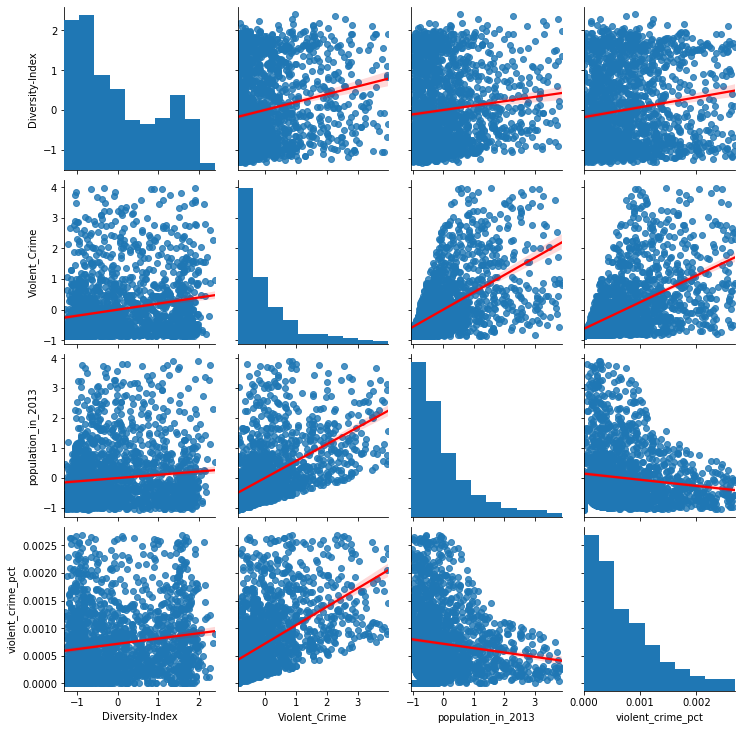

In [44]:
sns.pairplot(df_temp, kind='reg', plot_kws={'line_kws':{'color':'red'}})

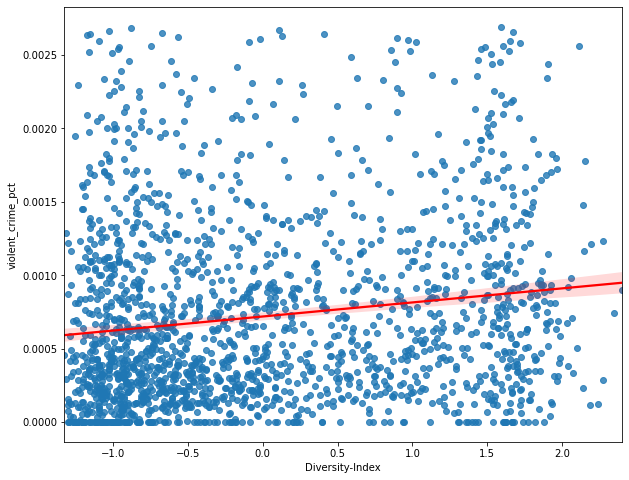

In [45]:
plt.figure(figsize=(10,8))
sns.regplot(x='Diversity-Index', y='violent_crime_pct', data=df_temp, line_kws={'color':'red'})

In [21]:

from pycaret.regression import *

df_regr = df_temp[['Diversity-Index', 'violent_crime_pct']].sort_values('Diversity-Index')

regr = setup(df_regr, target='violent_crime_pct', \
    normalize=True, remove_multicollinearity=True, create_clusters=True, remove_outliers=True)

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:42:14
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
Diversity-Index,Numeric
violent_crime_pct,Label


KeyboardInterrupt: Interrupted by user

In [ ]:
best = compare_models()

In [ ]:
best